<a href="https://colab.research.google.com/github/kalyanimane/project-file/blob/main/ELectric_Motor_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
#!pip install pandas
#!pip install xgboost
#!pip install lightgbm

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor
from sklearn.linear_model import PoissonRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

**EDA**


Load The Datasetof temperature_data

In [ ]:
td=pd.read_csv('temperature_data (1).csv')

In [ ]:
# Displaying top 10 rows
td.head(10)

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4.0
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4.0
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4.0
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4.0
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4.0
5,-0.762936,-1.116955,0.334901,-1.303017,-1.222429,-0.248197,1.031031,-0.246341,-2.522203,-1.831931,-2.062549,-2.017884,4.0
6,-0.749228,-1.116170,0.335014,-1.302082,-1.222430,-0.247914,1.030493,-0.246162,-2.522538,-1.833012,-2.062115,-2.017243,4.0
7,-0.738450,-1.113986,0.336256,-1.305155,-1.222432,-0.248321,1.030107,-0.246035,-2.522844,-1.832182,-2.061953,-2.017213,4.0
8,-0.730910,-1.111828,0.334905,-1.303790,-1.222431,-0.247785,1.029851,-0.245981,-2.522808,-1.831576,-2.062443,-2.017739,4.0
9,-0.727130,-1.109486,0.335988,-1.305633,-1.222431,-0.248294,1.029636,-0.245888,-2.522677,-1.831438,-2.062317,-2.018180,4.0


In [ ]:
# Displaying Last 10 Rows
td.tail(10)

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
118143,-0.136084,-1.086343,-0.591282,-0.119235,-0.546065,1.167146,0.274379,1.284836,1.269205,-0.743733,-0.529701,-0.381631,20.0
118144,-0.155249,-1.084069,-0.591365,-0.119233,-0.546066,1.167435,0.274406,1.284845,1.267886,-0.744616,-0.529756,-0.383358,20.0
118145,-0.161619,-1.081523,-0.591135,-0.119160,-0.546062,1.167373,0.274331,1.284840,1.266514,-0.746083,-0.529820,-0.384090,20.0
118146,-0.155691,-1.079188,-0.590736,-0.118856,-0.546067,1.167315,0.274373,1.284833,1.265329,-0.747621,-0.529869,-0.383690,20.0
118147,-0.150895,-1.077418,-0.590831,-0.118836,-0.546069,1.167320,0.274404,1.284847,1.264406,-0.748571,-0.529917,-0.383571,20.0
118148,-0.151030,-1.077675,-0.590684,-0.118775,-0.546063,1.167379,0.274333,1.284839,1.263581,-0.748936,-0.529968,-0.385122,20.0
118149,-0.153139,-1.079601,-0.590613,-0.118701,-0.546064,1.167715,0.274376,1.284831,1.262671,-0.749153,-0.530004,-0.386775,20.0
118150,-0.154975,-1.081907,-0.590559,-0.118685,-0.546072,1.167570,0.274406,1.284845,1.261739,-0.749153,-0.530030,-0.387834,20.0
118151,-0.155175,-1.084360,-0.590255,-0.118539,-0.546064,1.167466,0.274333,1.284840,1.260555,-0.749142,-0.529962,-0.387704,20.0
118152,-0.148743,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Display the numbers of rows and columns
td.shape

(118153, 13)

In [ ]:
# Display the datatypes
td.dtypes

,0
ambient,float64
coolant,float64
u_d,float64
u_q,float64
motor_speed,float64
torque,float64
i_d,float64
i_q,float64
pm,float64
stator_yoke,float64


In [ ]:
td.columns

Index(['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'torque', 'i_d',
       'i_q', 'pm', 'stator_yoke', 'stator_tooth', 'stator_winding',
       'profile_id'],
      dtype='object')

In [ ]:
# Display information of dataset
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118153 entries, 0 to 118152
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ambient         118153 non-null  float64
 1   coolant         118153 non-null  float64
 2   u_d             118152 non-null  float64
 3   u_q             118152 non-null  float64
 4   motor_speed     118152 non-null  float64
 5   torque          118152 non-null  float64
 6   i_d             118152 non-null  float64
 7   i_q             118152 non-null  float64
 8   pm              118152 non-null  float64
 9   stator_yoke     118152 non-null  float64
 10  stator_tooth    118152 non-null  float64
 11  stator_winding  118152 non-null  float64
 12  profile_id      118152 non-null  float64
dtypes: float64(13)
memory usage: 11.7 MB


In [ ]:
# Displaying summary statistics for all numerical columns
td.describe()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
count,118153.000000,118153.000000,118152.000000,118152.000000,118152.000000,118152.000000,118152.000000,118152.000000,118152.000000,118152.000000,118152.000000,118152.000000,118152.000000
mean,-0.327997,-0.910297,-0.294918,0.313481,0.392057,0.069178,-0.124067,0.060997,-0.365672,-0.849281,-0.687144,-0.554397,8.796550
std,0.776033,0.508481,0.943146,0.851635,1.045290,0.740590,1.067507,0.730768,1.160921,0.766503,0.975888,1.076079,5.675865
min,-3.698899,-1.288667,-1.655373,-1.861463,-1.239020,-2.808664,-3.245874,-2.398035,-2.524219,-1.834688,-2.066143,-2.019973,4.000000
25%,-0.947533,-1.081837,-1.141296,-0.462791,-0.646163,-0.259486,-1.032148,-0.245729,-1.304130,-1.485757,-1.600948,-1.646765,4.000000
50%,-0.363295,-1.069069,-0.095361,0.642215,0.130300,0.178660,-0.338192,0.231750,-0.529995,-1.013608,-0.836329,-0.720453,6.000000
75%,0.310908,-1.050216,0.310804,0.888873,1.483026,0.357884,1.004194,0.323064,0.380772,-0.509118,-0.074533,0.154430,10.000000
max,2.712510,1.110164,2.274734,1.785646,2.024164,2.662035,1.033528,2.595456,2.704275,1.331096,1.441976,1.929580,20.000000


In [ ]:
# Checking for duplicated rows
td.duplicated().sum()

0

In [ ]:
# Checking for missing values
td.isna().sum()

,0
ambient,0
coolant,0
u_d,1
u_q,1
motor_speed,1
torque,1
i_d,1
i_q,1
pm,1
stator_yoke,1


In [ ]:
unique_values = td['profile_id'].unique()
print(unique_values)

[ 4.  6. 10. 11. 20. nan]


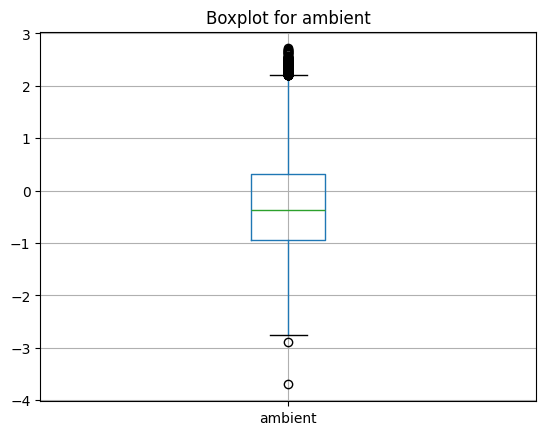

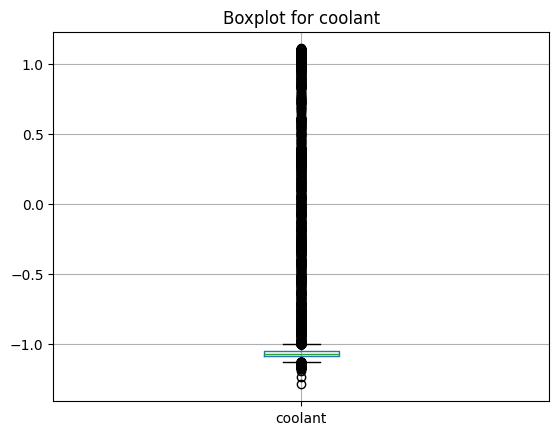

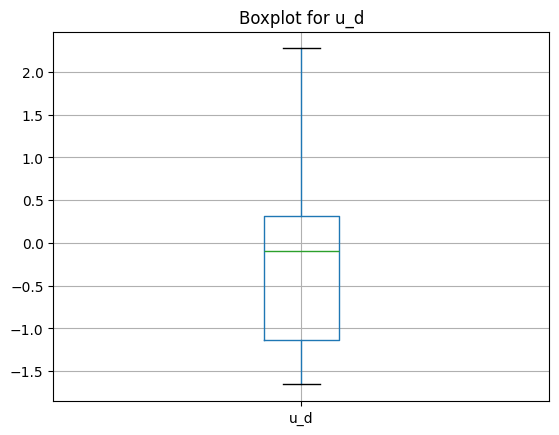

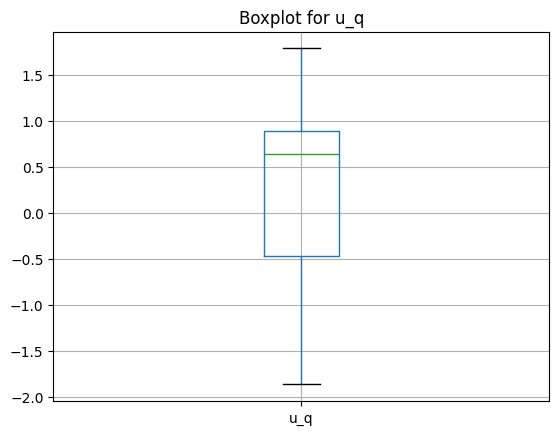

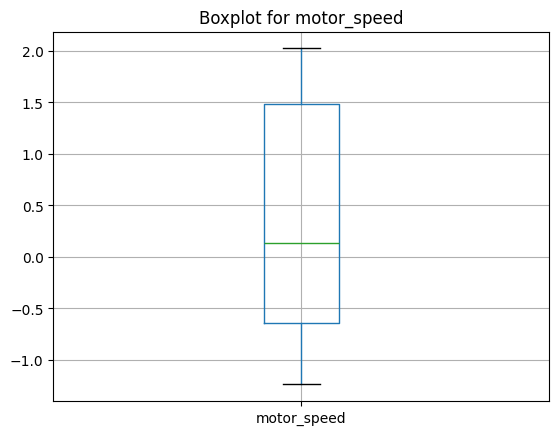

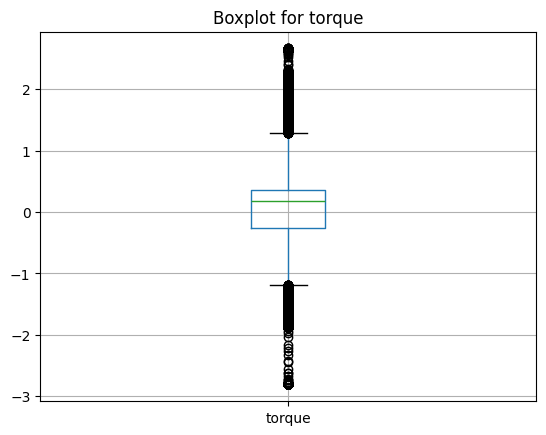

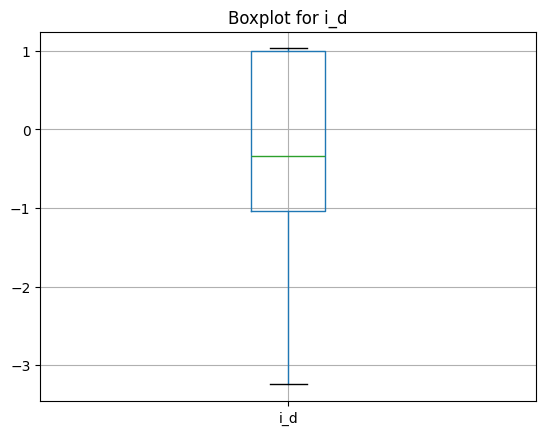

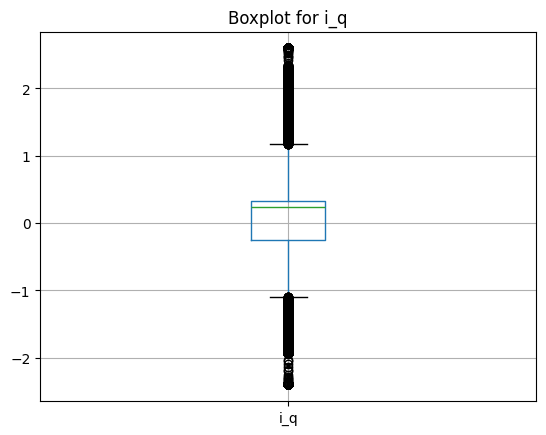

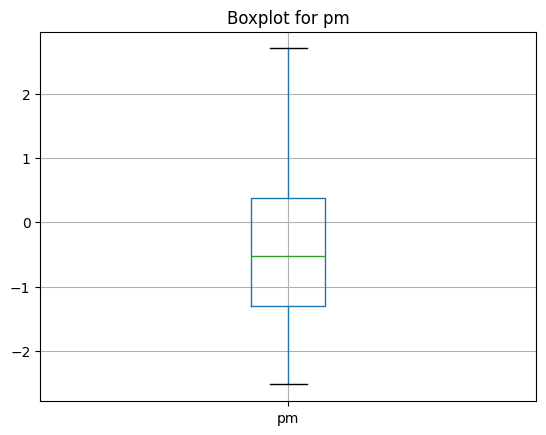

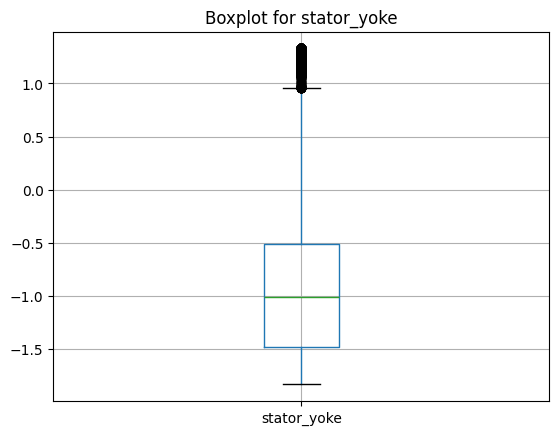

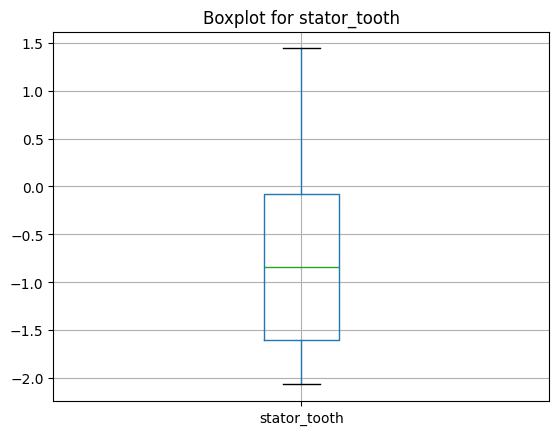

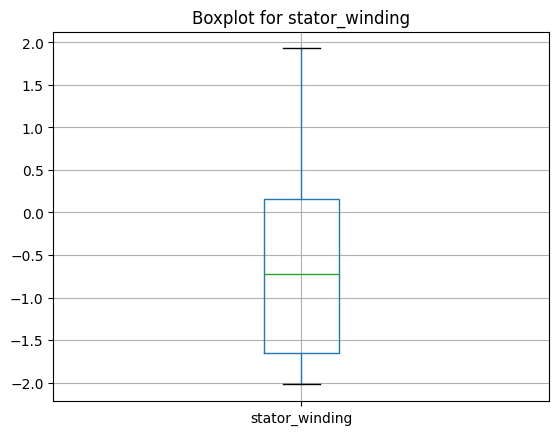

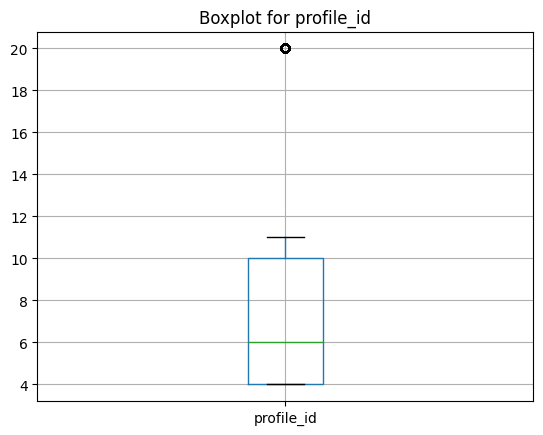

In [ ]:
# Boxplot for Checking Outliers
for column in td.columns:
    plt.figure()
    td.boxplot(column=column)
    plt.title(f'Boxplot for {column}')
    plt.show()


In [ ]:
# calculates the number of outliers per column using IQR method
outliers_count = ((td < (td.quantile(0.25) - 1.5 * (td.quantile(0.75) - td.quantile(0.25)))) | (td > (td.quantile(0.75) + 1.5 * (td.quantile(0.75) - td.quantile(0.25))))).sum()
outliers_count

,0
ambient,255
coolant,11501
u_d,0
u_q,0
motor_speed,0
torque,11191
i_d,0
i_q,12485
pm,0
stator_yoke,5194


In [ ]:
# remove outliers
def outlier_Detection(td,columns):
    for col in columns:
        Q1=td[col].quantile(0.25)
        Q3=td[col].quantile(0.75)
        iqr=Q3-Q1
        lower=Q1-1.5*iqr
        upper=Q3+1.5*iqr
        td[col]=np.where(td[col]>upper,upper,np.where(td[col]<lower,lower,td[col]))
    return td

In [ ]:
outlier_Detection(td,['ambient','u_d','torque','i_q','pm'])

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4.0
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4.0
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4.0
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4.0
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118148,-0.151030,-1.077675,-0.590684,-0.118775,-0.546063,1.167379,0.274333,1.176253,1.263581,-0.748936,-0.529968,-0.385122,20.0
118149,-0.153139,-1.079601,-0.590613,-0.118701,-0.546064,1.167715,0.274376,1.176253,1.262671,-0.749153,-0.530004,-0.386775,20.0
118150,-0.154975,-1.081907,-0.590559,-0.118685,-0.546072,1.167570,0.274406,1.176253,1.261739,-0.749153,-0.530030,-0.387834,20.0
118151,-0.155175,-1.084360,-0.590255,-0.118539,-0.546064,1.167466,0.274333,1.176253,1.260555,-0.749142,-0.529962,-0.387704,20.0


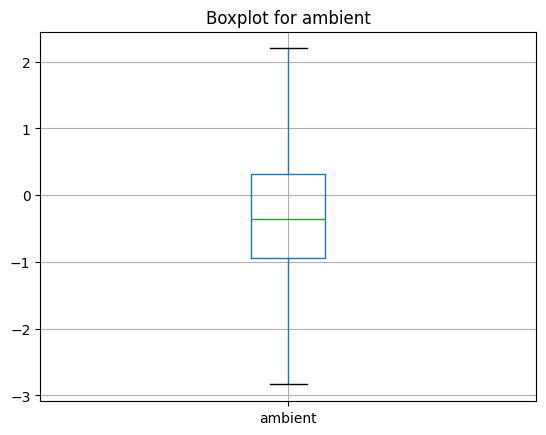

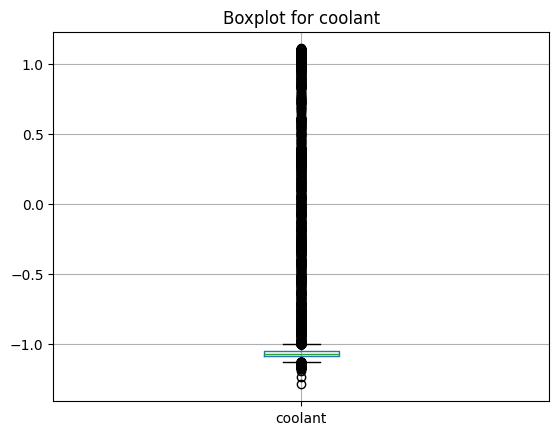

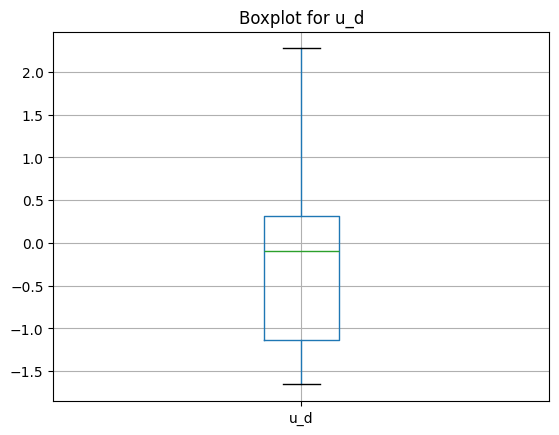

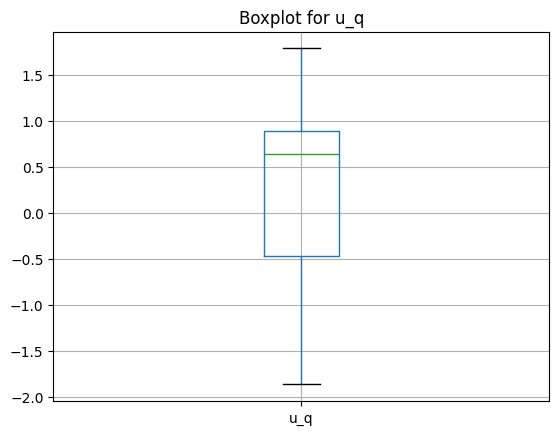

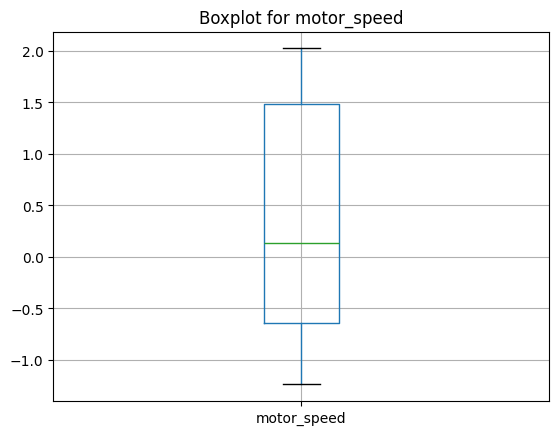

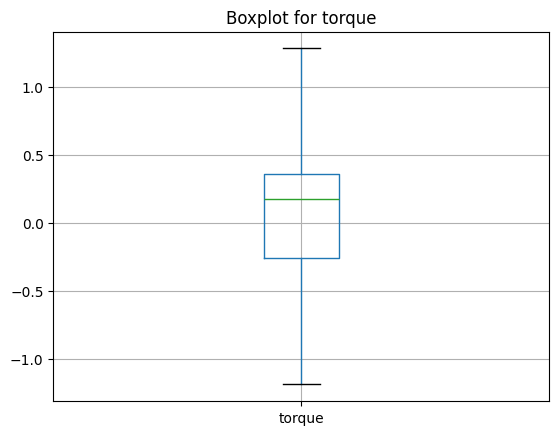

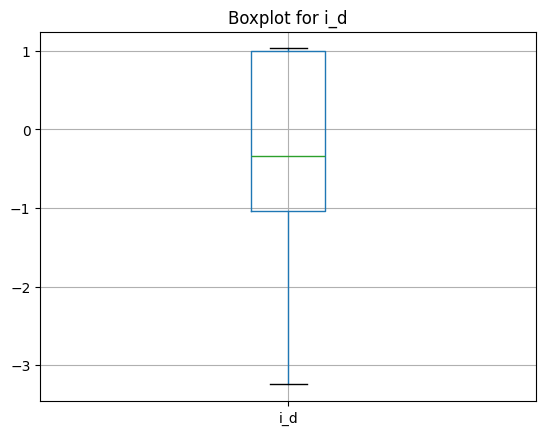

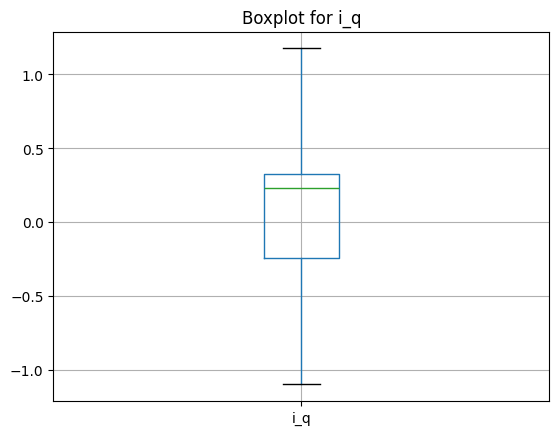

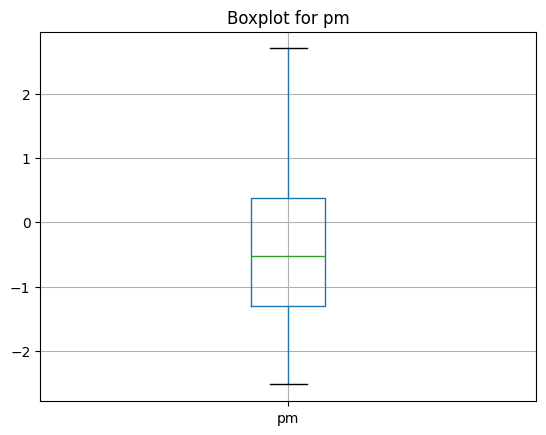

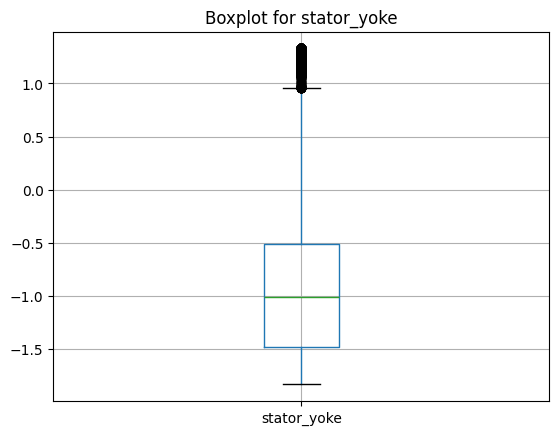

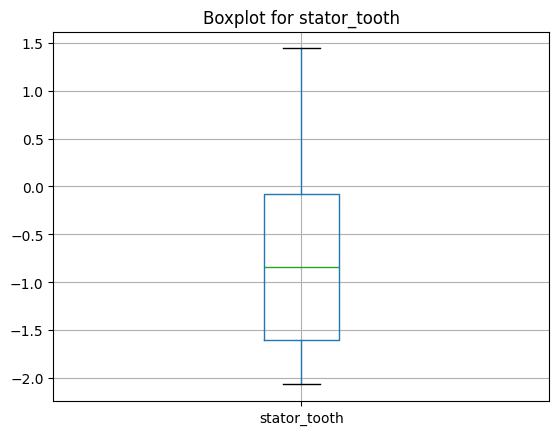

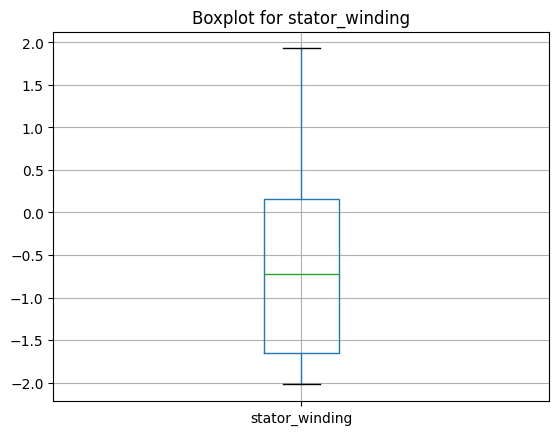

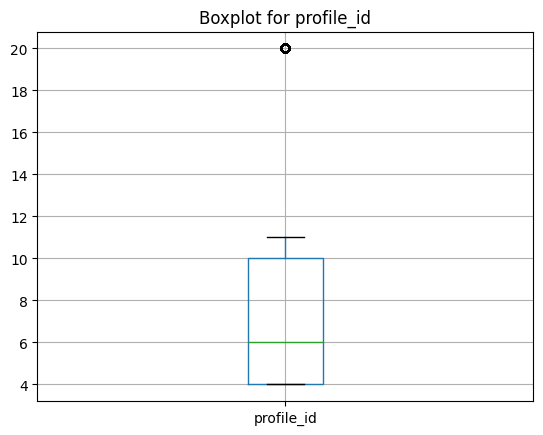

In [ ]:
# Checking for outliers through the Boxplot
for column in td.columns:
    plt.figure()
    td.boxplot(column=column)
    plt.title(f'Boxplot for {column}')
    plt.show()

In [ ]:
# calculates the number of outliers per column using IQR method
outliers_count = ((td < (td.quantile(0.25) - 1.5 * (td.quantile(0.75) - td.quantile(0.25)))) | (td > (td.quantile(0.75) + 1.5 * (td.quantile(0.75) - td.quantile(0.25))))).sum()
outliers_count

,0
ambient,0
coolant,11501
u_d,0
u_q,0
motor_speed,0
torque,0
i_d,0
i_q,0
pm,0
stator_yoke,5194


**Visualization**

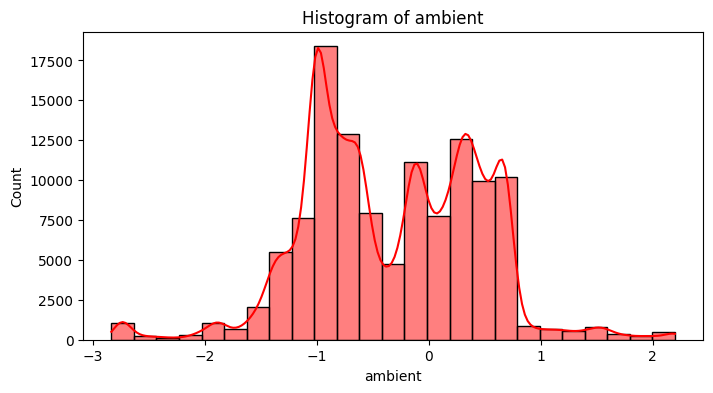

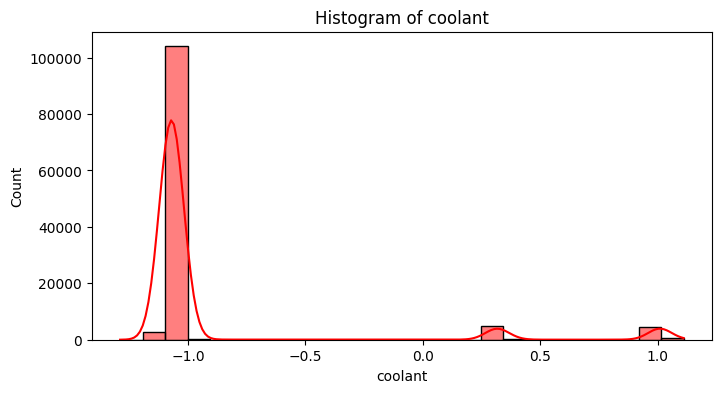

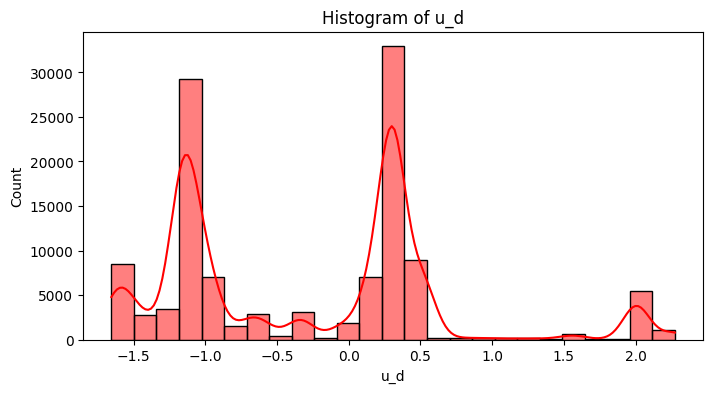

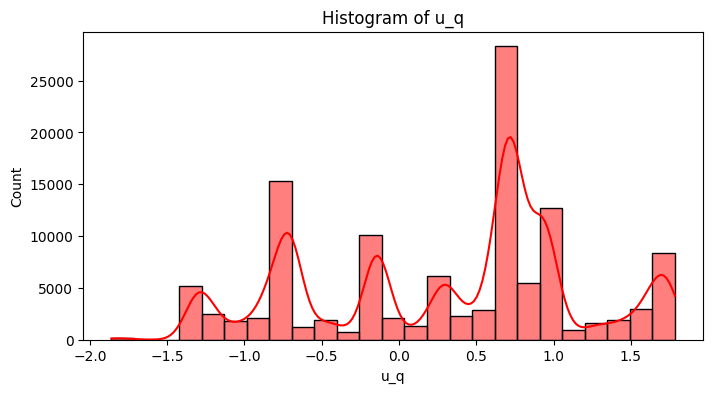

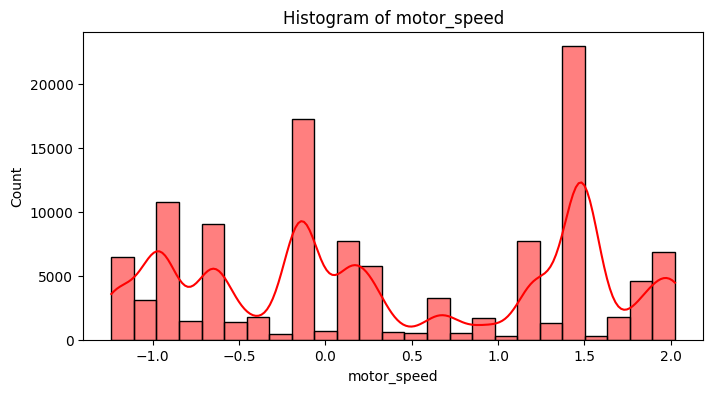

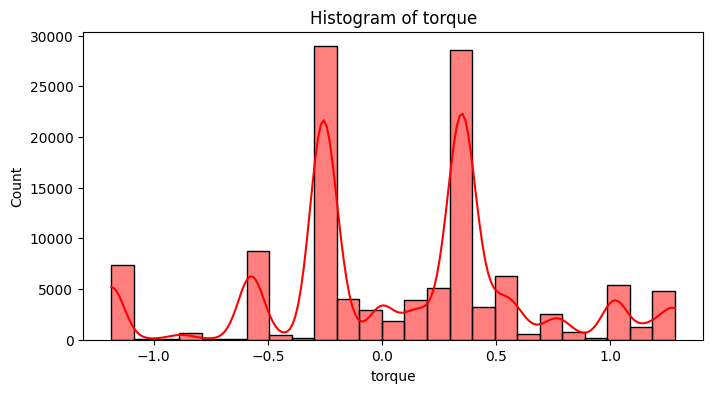

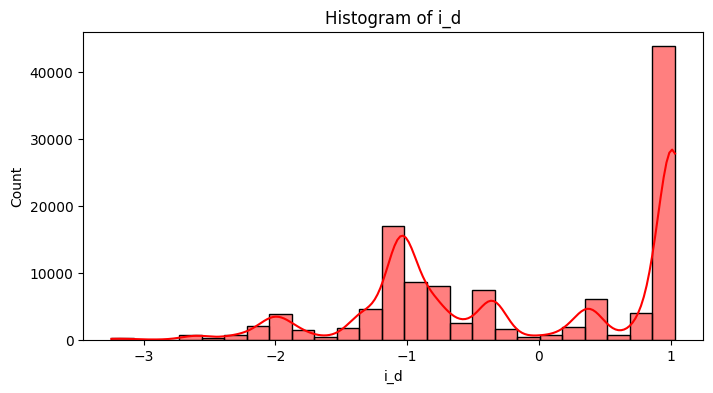

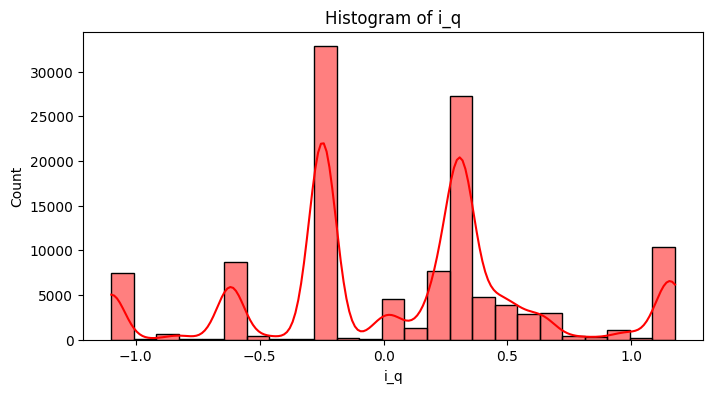

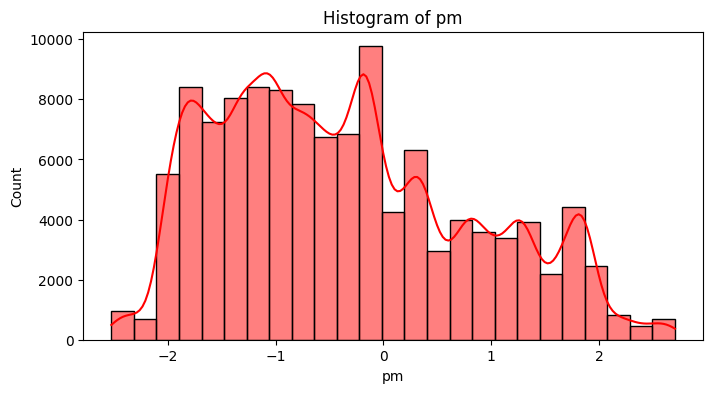

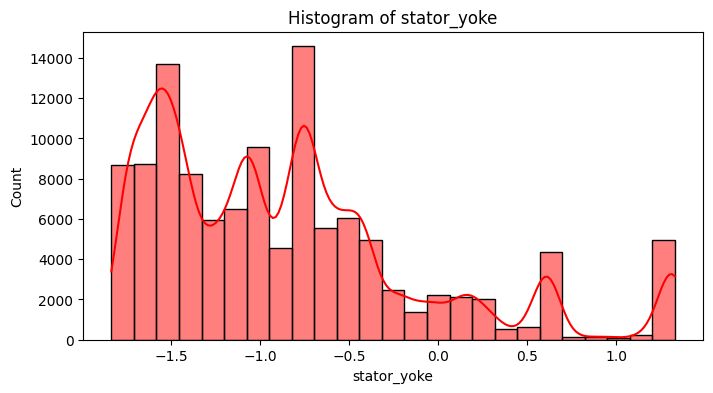

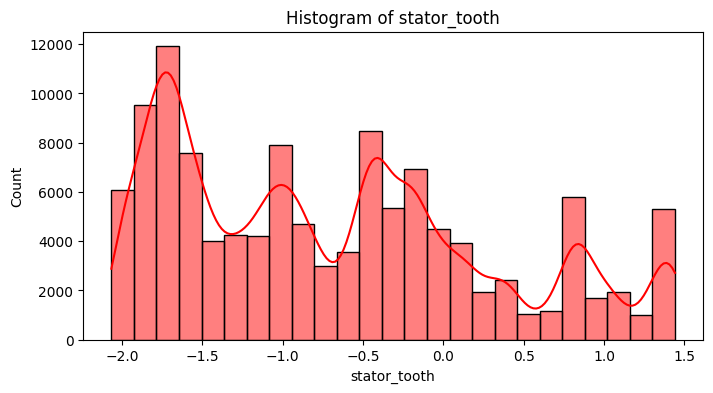

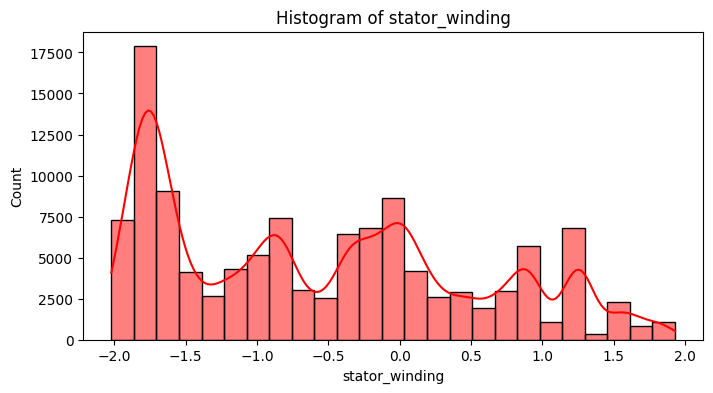

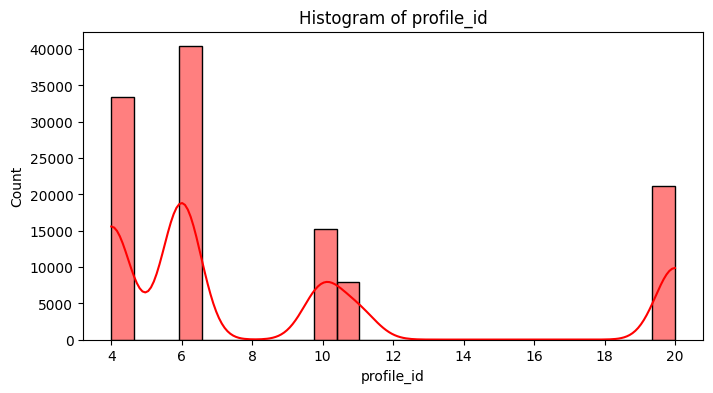

In [ ]:
# Histogram
for column in td:
    plt.figure(figsize=(8, 4))
    sns.histplot(td[column], kde=True, bins=25, color='Red')
    plt.title(f"Histogram of {column}")
    plt.show()

Compute the correlation matrix

In [ ]:
td.corr()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
ambient,1.000000,0.310398,-0.009824,-0.184511,0.034412,-0.009523,-0.106880,-0.003527,0.488783,0.357969,0.318157,0.280494,-0.334261
coolant,0.310398,1.000000,-0.290855,0.150089,0.334127,0.144370,-0.268702,0.135667,0.499092,0.755044,0.586981,0.480506,-0.151863
u_d,-0.009824,-0.290855,1.000000,-0.121224,-0.577372,-0.871529,0.591306,-0.835987,-0.458956,-0.506335,-0.539948,-0.548025,-0.112185
u_q,-0.184511,0.150089,-0.121224,1.000000,0.511561,-0.002596,-0.058605,0.017318,-0.022489,0.150731,0.122745,0.056372,0.063311
motor_speed,0.034412,0.334127,-0.577372,0.511561,1.000000,0.273153,-0.830397,0.237999,0.562139,0.641927,0.709748,0.706506,0.094678
torque,-0.009523,0.144370,-0.871529,-0.002596,0.273153,1.000000,-0.416797,0.994181,0.282665,0.332817,0.364179,0.393001,0.105340
i_d,-0.106880,-0.268702,0.591306,-0.058605,-0.830397,-0.416797,1.000000,-0.371166,-0.591573,-0.657179,-0.761266,-0.814788,-0.097714
i_q,-0.003527,0.135667,-0.835987,0.017318,0.237999,0.994181,-0.371166,1.000000,0.257082,0.310792,0.336310,0.361468,0.089004
pm,0.488783,0.499092,-0.458956,-0.022489,0.562139,0.282665,-0.591573,0.257082,1.000000,0.856615,0.878721,0.846824,-0.001652
stator_yoke,0.357969,0.755044,-0.506335,0.150731,0.641927,0.332817,-0.657179,0.310792,0.856615,1.000000,0.970415,0.924416,-0.007300


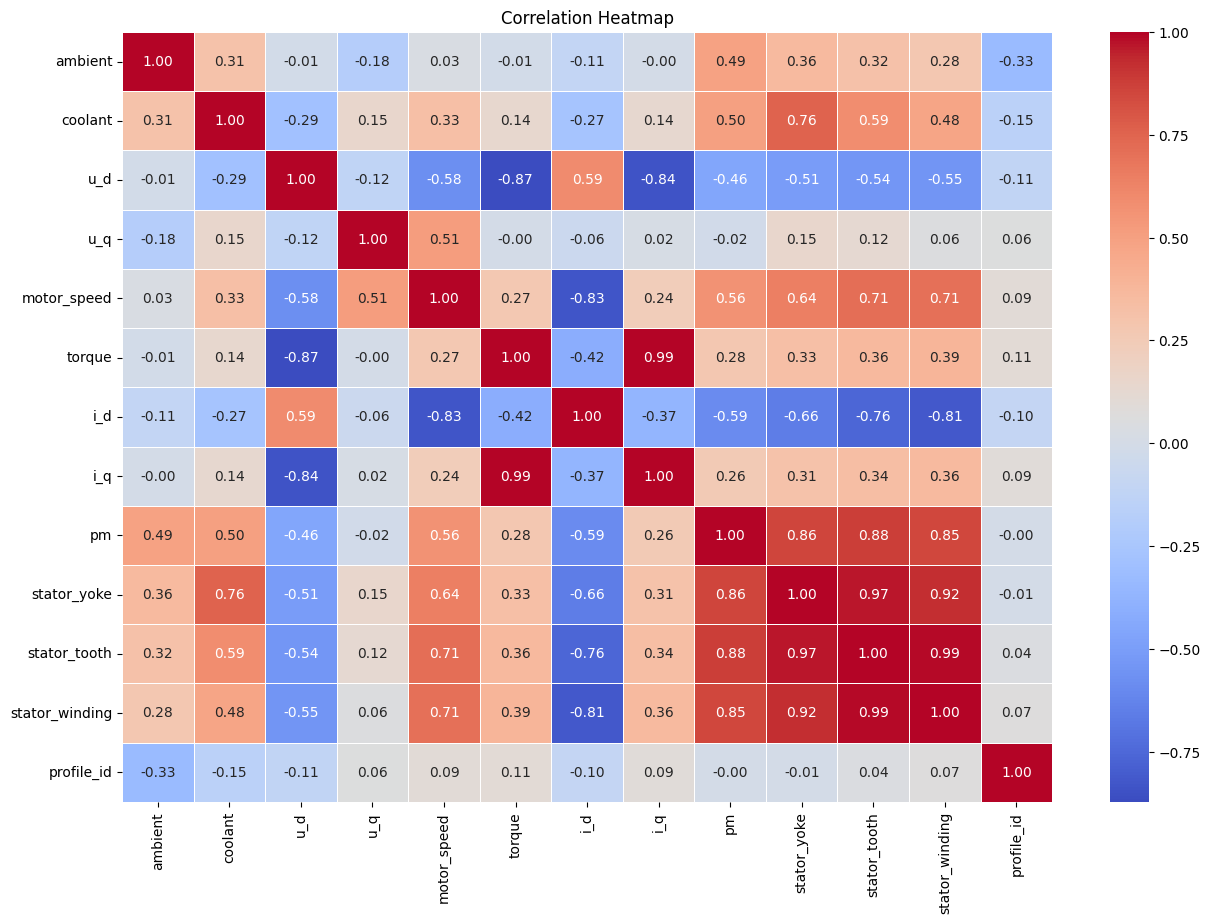

In [ ]:
# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(td.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
 #Specify the columns wanted to plot against 'motor_speed'
columns_to_plot = ['torque', 'u_d', 'u_q', 'i_d', 'i_q', 'ambient', 'coolant']

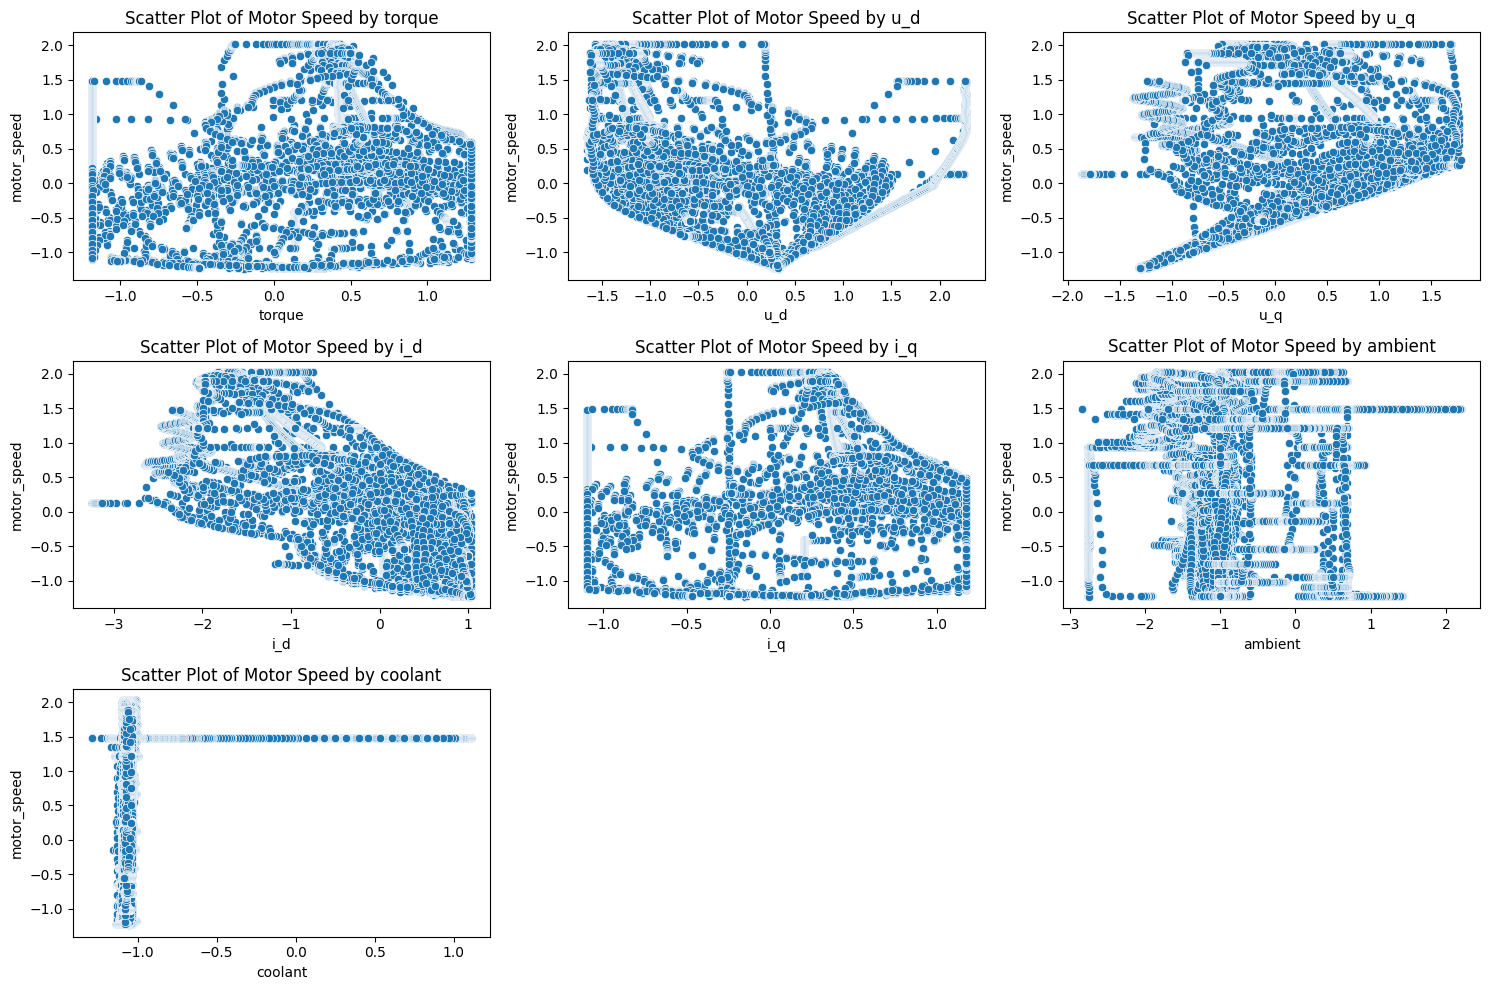

In [ ]:
# Create scatter plots for these columns
plt.figure(figsize=(15, 10))

for i, col in enumerate(columns_to_plot):
    plt.subplot(3,3, i + 1)
    sns.scatterplot(x=col, y='motor_speed', data=td)
    plt.title(f'Scatter Plot of Motor Speed by {col}')
    plt.xlabel(col)
    plt.ylabel('motor_speed')

plt.tight_layout()
plt.show()

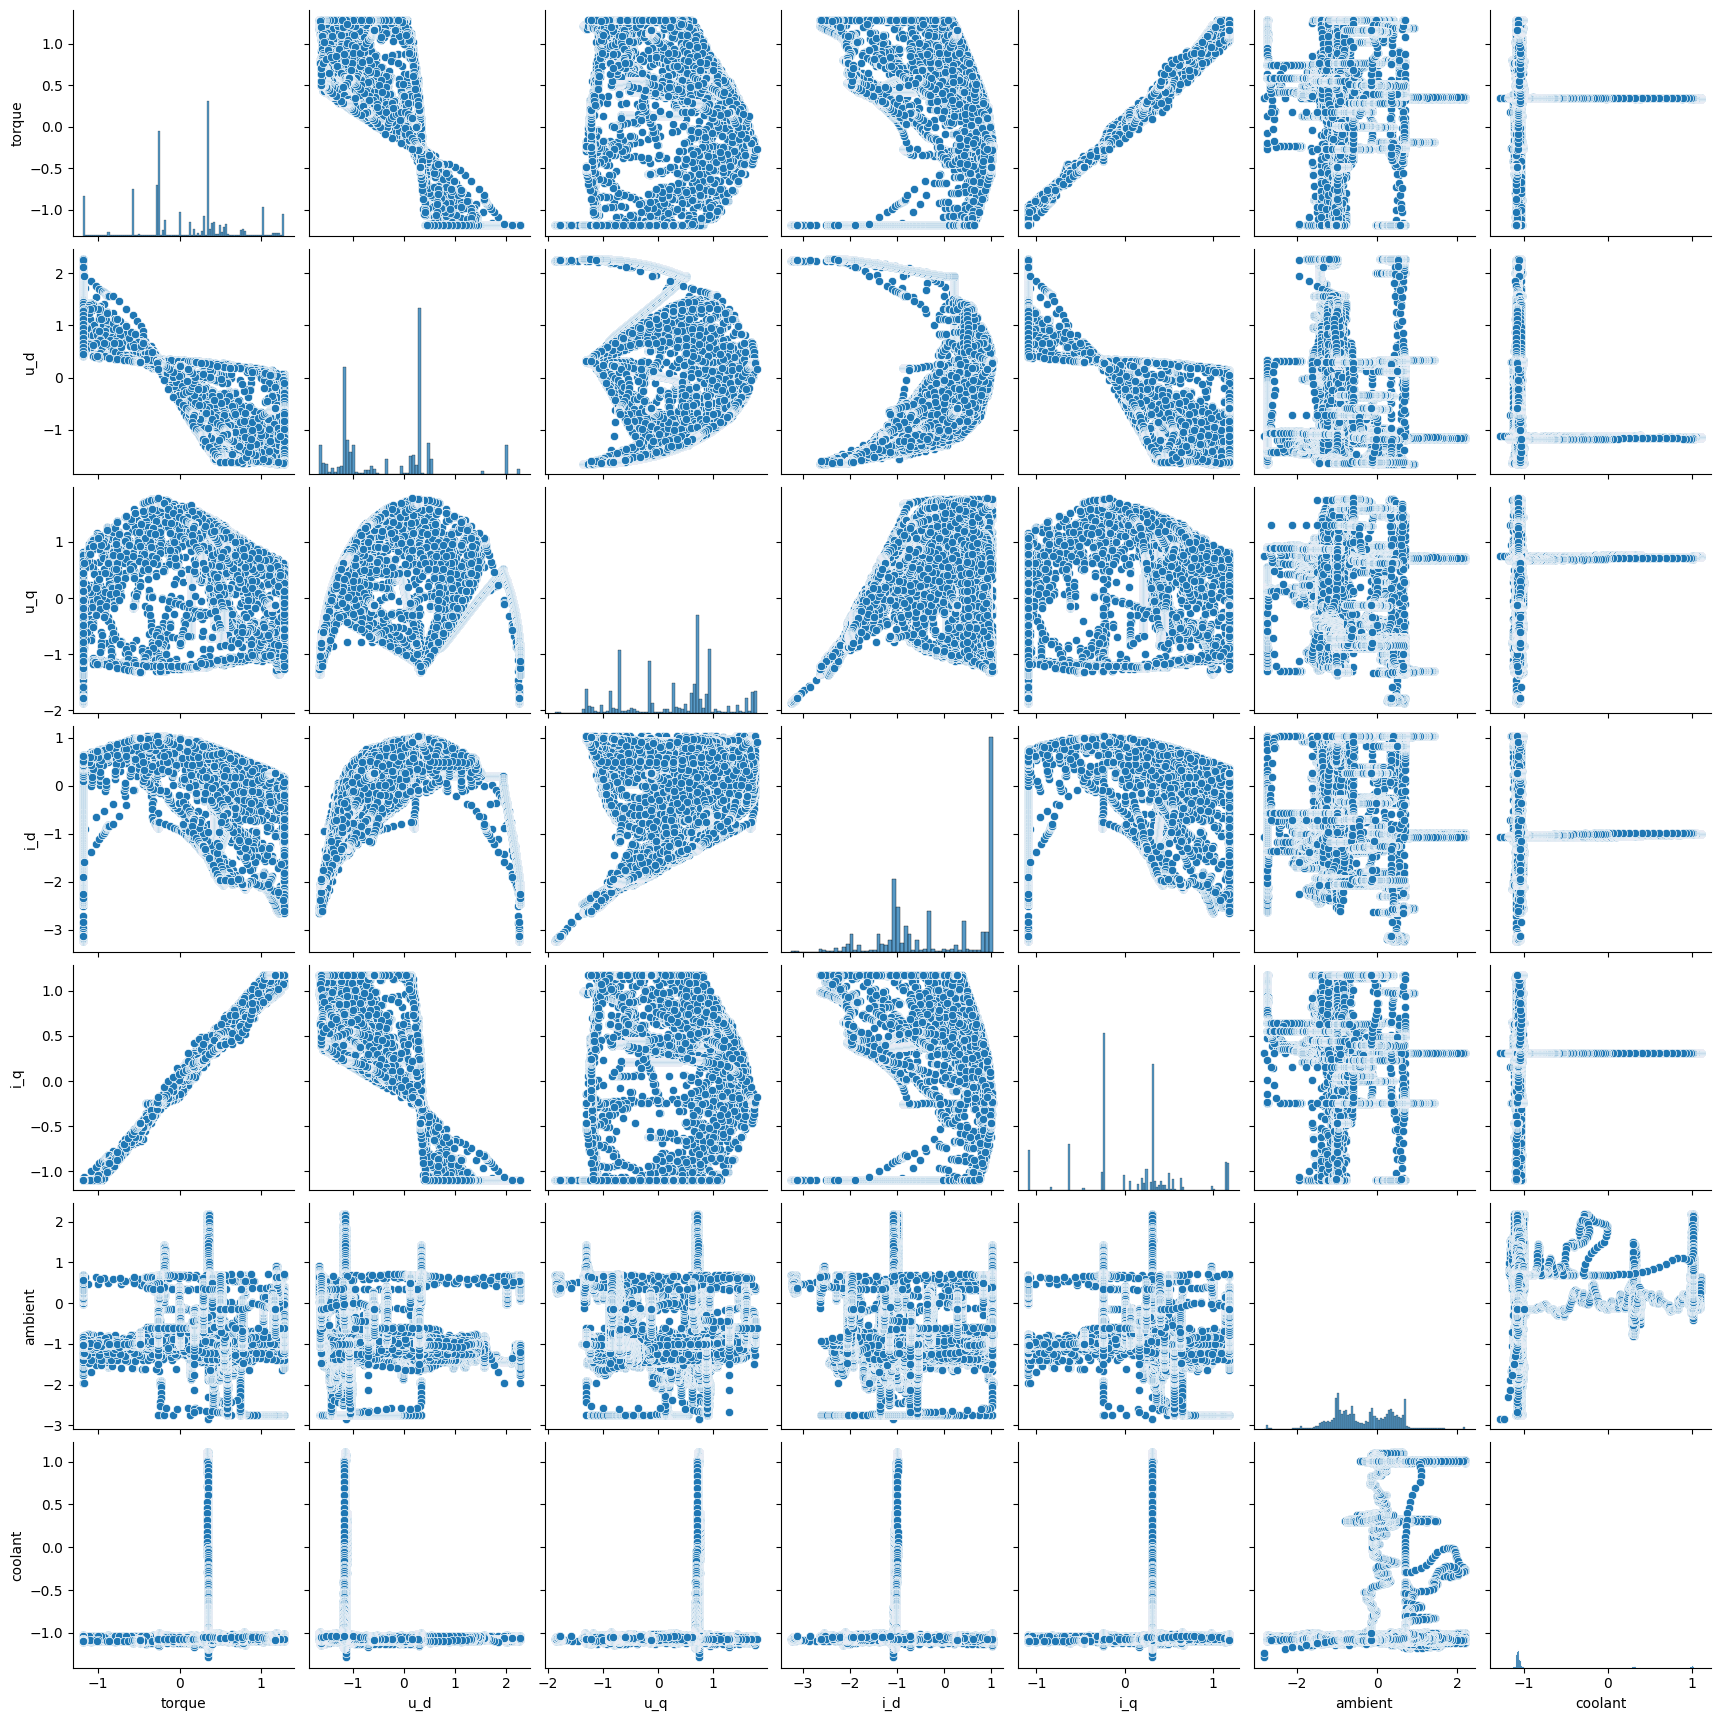

In [ ]:
sns.pairplot(td[columns_to_plot])
plt.show()

Feature Engineering

In [ ]:
x=td.drop(columns=["motor_speed"])
y=td["motor_speed"] # Target variable is "motor_speed"


In [ ]:
# Feature scaling (important for models like logistic regression)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x , y, test_size=0.2, random_state=42)

In [ ]:
# Impute missing values in 'motor_speed' with the mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1))  # Reshape for SimpleImputer
y_imputed = y_imputed.ravel()  # Flatten back to original shape

# Now split the data after imputation
x_train, x_test, y_train, y_test = train_test_split(x, y_imputed, test_size=0.2, random_state=42)

# Model 1: DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)
dt_pred = dt_model.predict(x_test)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))
dt_mae = mean_absolute_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

In [ ]:
# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')  # You can use other strategies like 'median'
x_imputed = imputer.fit_transform(x)

# Impute missing values in the target variable as well if they exist
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1))
y_imputed = y_imputed.ravel()  # Flatten back to original shape

# Now split the data after imputation
x_train, x_test, y_train, y_test = train_test_split(x_imputed, y_imputed, test_size=0.2, random_state=42)

# Model 2: LinearRegression
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)
lin_pred = lin_model.predict(x_test)
lin_rmse = np.sqrt(mean_squared_error(y_test, lin_pred))
lin_mae = mean_absolute_error(y_test, lin_pred)
lin__r2 = r2_score(y_test, lin_pred)

In [ ]:
# Model 3: RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

In [ ]:
# Model 4: XGBoosttRegressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(x_train, y_train)
xgb_pred = xgb_model.predict(x_test)

xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)

In [ ]:
# Model 5: LightGBMRegressor
lgbm_model = LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
lgbm_model.fit(x_train, y_train)
lgbm_pred = lgbm_model.predict(x_test)

lgbm_rmse = np.sqrt(mean_squared_error(y_test, lgbm_pred))
lgbm_mae = mean_absolute_error(y_test, lgbm_pred)
lgbm_r2 = r2_score(y_test, lgbm_pred)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004377 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2811
[LightGBM] [Info] Number of data points in the train set: 94522, number of used features: 12
[LightGBM] [Info] Start training from score 0.391292
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [43]:
# Model 6: KneighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(x_train, y_train)
knn_pred = knn_model.predict(x_test)

knn_rmse = np.sqrt(mean_squared_error(y_test, knn_pred))
knn_mae = mean_absolute_error(y_test, knn_pred)
knn_r2 = r2_score(y_test, knn_pred)

In [44]:
# Print the results
print("Decision Tree Regressor:")
print(f"RMSE: {dt_rmse}, MAE: {dt_mae}, R²: {dt_r2}\n")

print("Linear Regression (baseline, classification model):")
print(f"RMSE: {lin_rmse}, MAE: {lin_mae}, R²: {lin__r2}\n")

print("Random Forest Regressor:")
print(f"RMSE: {rf_rmse}, MAE: {rf_mae}, R²: {rf_r2}\n")

print("XGBoost Regressor:")
print(f"RMSE: {xgb_rmse}, MAE: {xgb_mae}, R²: {xgb_r2}\n")

print("LightGBM Regressor:")
print(f"RMSE: {lgbm_rmse}, MAE: {lgbm_mae}, R²: {lgbm_r2}\n")

print("XKneighbors Regressor:")
print(f"RMSE: {knn_rmse}, MAE: {knn_mae}, R²: {knn_r2}\n")

Decision Tree Regressor:
RMSE: 0.01412999222300257, MAE: 0.0014087716530371047, R²: 0.9998190564898175

Linear Regression (baseline, classification model):
RMSE: 0.17349582331084296, MAE: 0.1220914888082752, R²: 0.9727204492579791

Random Forest Regressor:
RMSE: 0.01255565809168363, MAE: 0.0010856256737635777, R²: 0.9998571309598694

XGBoost Regressor:
RMSE: 0.012835420170207862, MAE: 0.0031529699841075665, R²: 0.9998506932832754

LightGBM Regressor:
RMSE: 0.014656104426126797, MAE: 0.0038515938205897693, R²: 0.9998053312380386

XKneighbors Regressor:
RMSE: 0.01577803180483926, MAE: 0.0021946755813283384, R²: 0.9997743866366937



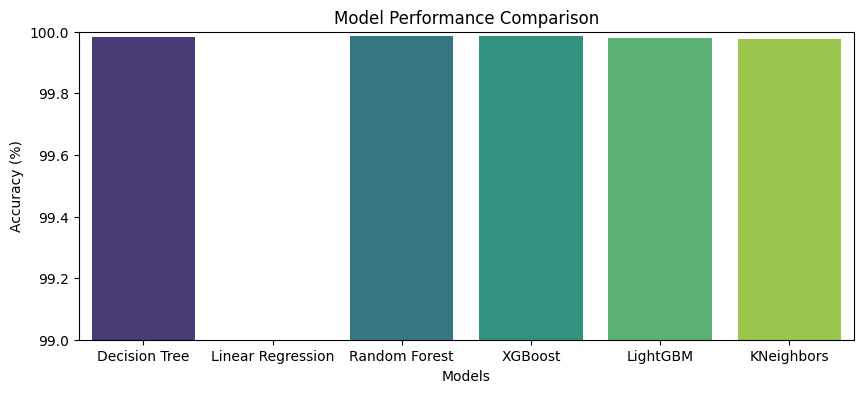

In [45]:

Model_Evaluations = {
    'Models': ['Decision Tree', 'Linear Regression', 'Random Forest', 'XGBoost', 'LightGBM', 'KNeighbors'],
    'Accuracy': [dt_r2 * 100, lin__r2 * 100, rf_r2 * 100, xgb_r2 * 100, lgbm_r2 * 100, knn_r2 * 100]
}

# Convert the dictionary to a Pandas DataFrame
Model_Evaluations = pd.DataFrame(Model_Evaluations)

# Visualization
plt.figure(figsize=(10, 4))
sns.barplot(x='Models', y='Accuracy', data=Model_Evaluations, palette='viridis')
plt.title('Model Performance Comparison')
plt.ylabel('Accuracy (%)')
plt.xlabel('Models')
plt.ylim(99,100)
plt.show()

In [46]:
best_model = RandomForestRegressor(random_state=42)
best_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Prediction with test data

model_pred = best_model.predict(x_test)
model_pred

**Deployment**

In [48]:
!pip install streamlit

import streamlit as st
import joblib
import numpy as np
import nbformat
from nbconvert import PythonExporter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 89.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.5 MB/s eta 0:00:00


In [49]:
# Load the trained model
joblib.dump(best_model,'motor_speed_model.pkl')  # Replace with your actual model filename


['motor_speed_model.pkl']

In [50]:
# Streamlit App
st.title('Electric Motor Speed Prediction')
st.write('Enter the sensor data to predict the motor speed.')

2025-02-14 08:02:48.700 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-14 08:02:48.969 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-02-14 08:02:48.976 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-14 08:02:48.981 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-14 08:02:48.987 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-14 08:02:48.989 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-14 08:02:48.990 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [51]:
# Input fields for features
ambient = st.number_input('Ambient Temperature')
coolant = st.number_input('Coolant Temperature')
u_d = st.number_input('Voltage d-axis (u_d)')
u_q = st.number_input('Voltage q-axis (u_q)')
torque = st.number_input('Torque')
i_d = st.number_input('Current d-axis (i_d)')
i_q = st.number_input('Current q-axis (i_q)')
pm = st.number_input('Permanent Magnet Temperature')
stator_yoke = st.number_input('Stator Yoke Temperature')
stator_tooth = st.number_input('Stator Tooth Temperature')
stator_winding = st.number_input('Stator Winding Temperature')
profile_id = st.number_input('Profile ID')

2025-02-14 08:03:30.660 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-14 08:03:30.663 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-14 08:03:30.680 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-14 08:03:30.687 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-14 08:03:30.688 Session state does not function when running a script without `streamlit run`
2025-02-14 08:03:30.690 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-14 08:03:30.691 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-14 08:03:30.696 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-14 08:03

In [52]:
# Prediction button
if st.button('Predict Motor Speed'):
    # Prepare input data
    features = np.array([[ambient, coolant, u_d, u_q, torque, i_d, i_q, pm,
                           stator_yoke, stator_tooth, stator_winding, profile_id]])

    # Make prediction
    prediction = model.predict(features)

    # Display the prediction
    st.success(f'Predicted Motor Speed: {prediction[0]:.2f} RPM')

2025-02-14 08:04:23.205 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-14 08:04:23.207 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-14 08:04:23.209 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-14 08:04:23.213 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-14 08:04:23.215 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
